# **Logistic Regression Classification**

Logistic regression binary classification (bir veri için 0-1,kedi-köpek gibi iki farklı sonuç üretilmesi) ile çalışır. Bu yüzden bir classification algoritmasıdır.

Logistic regression çok basit sinir ağı modelidir. Sinir ağı ve deep learning aynı şeydir.

Logistic regression derin öğrenmeye girişte anlatılır.

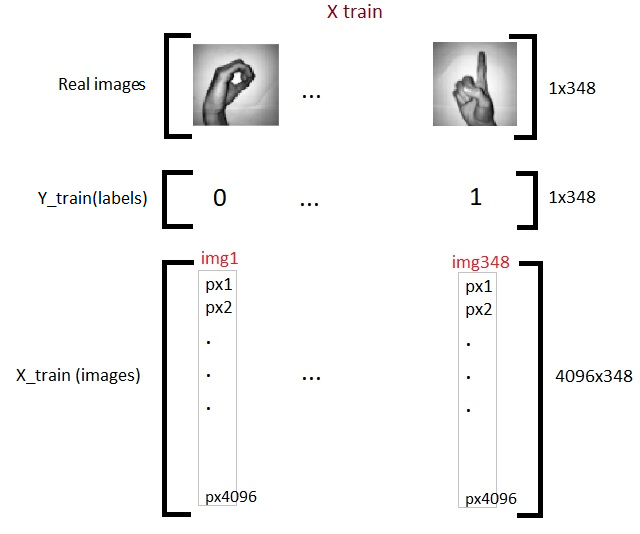

Datadaki her bir görsel 64x64 piksel boyutuna sahiptir. Böylelikle her bir görselde 4096 tane piksel olduğu anlaşılır.

Bu pikseller 0 ve 1 arasında değere sahiptir. Piksellerin rengi koyulaştıkça 1'e daha yakın değerde olduğu düşünülebilir.

Datadaki görseller logistic regression modeline öğretilebilmek için px1,px2,px3,...,px4096 şeklinde bir numpy array'e çevrilir. Bu görseller 4096x1 boyutunda bir numpy array olur. Bu piksellerin her birinin bir matematiksel değeri olduğundan array'e bu değerler yazılır. Böylelikle görseller train edilmek için hazır hale gelir.

Logistic Regression anlatmak için computation graph kullanılır.

**Computation graph** : Matematiksel ifadeleri görselleştirmek için kullanılan bir yöntemdir.

Logistic Regression'ı ifade etmek için kullanılan computation graph;

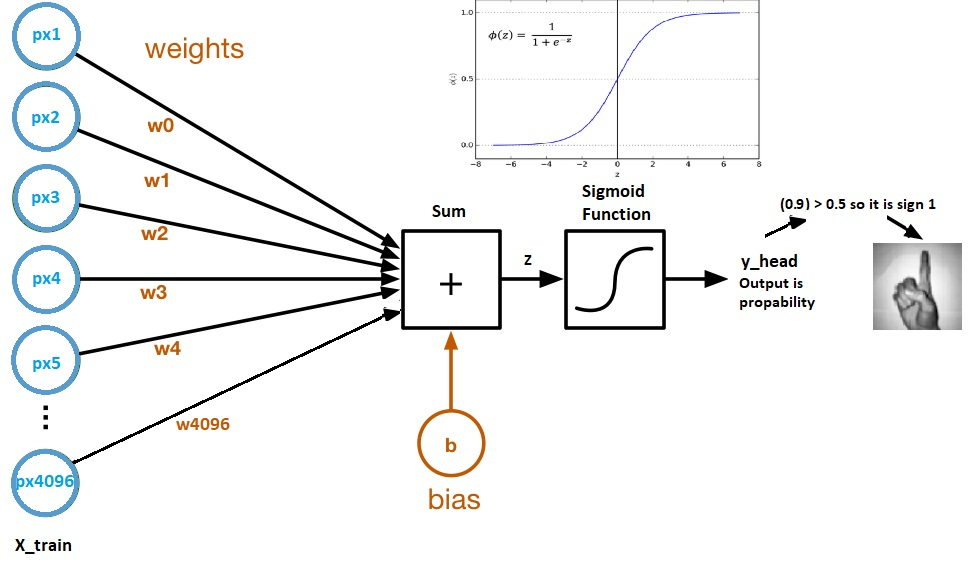

Amaç modeli test ya da train etmektir.

Datadaki görseller 64x64 boyutundadır. Bu durumda görsellerde 4096 tane piksel bulunmaktadır. Bu da 4096 feature demektir.

**Bu modelde öğrenilen parametreler weight ve bias'tır.**

**weight**: coefficient değerleri(her bir feature'ın katsayısı)

**bias**: intercept(constant)

weight ve bias güncellenerek tüm görseller eğitilir, en sonda çıkan weight ve bias tüm görsellere göre eğitilmiş olan logistic regression modelinin değerleridir.

Her bir piksel weights değeri ile çarpılır;

**px1*w1** 

**px2*w2...**

**px4096*w4096**

Daha sonra bu değerler bias değeri ile toplanıp bir z değeri elde edilir.

**z = (px1w1 + px2+w2 + … px4096w4096) + b**

Z değeri **Sigmoid function**'a tabi tutulur. Sigmoid function activation function olarak geçer, türevi alınabilen bir fonksiyondur ve sayıyı (z değerini) 0 ile 1 arasında bir değere eşitler.

Böylelikle Sigmoid function'dan çıkan sonuç bir **olasılık değeri** haline gelir. Bu değer de **y_head** değeridir.

y_head değerine 0.5 değerinde bir threshold koyulur. 0.5 değerinin üzerindekiler 1, altındakiler 0'dır.

Sigmoid Function türevi alınabilen bir fonksiyon olduğu için w0,w1 değerleri güncellenebilir. Türevi alınamayan bir fonksiyon kullanılsaydı weight ve bias değerleri güncellenemezdi.

z değerinin 4 olduğu düşünülürse, sigmoid function'a koyulduğunda y_head değerinin yaklaşık olarak 0.9 olduğu grafiğe bakılarak görülür. y_head değeri threshold'dan geçerek 1 sonucunu %90 olasılıkla verir.

z değerinin -2 olduğu düşünülürse, sigmoid function'a koyulduğunda y_head değerinin yaklaşık olarak 0.1 olduğu grafiğe bakılarak görülür. y_head değeri threshold'a koyulduğunda 0.5'ten küçük olduğu için 0 sonucunu verir.


*   Eğer sonuç yanlış bulunsaydı ne yapılacaktı ?
*   weight ve bias değerlerinin initial değerleri nedir, neye göre seçilir ?
*   Modelin tüm görsellere öğretilebilmesi için weight ve bias değerleri nasıl güncelenir ?

Bu soruların cevapları teker teker incelenecektir.





**Initializing Parameters**

Her bir görselde 4096 piksel bulunur.

Her pikselin bir weight değeri vardır.

İlk olarak weight değerleri piksellerle çarpılır.

Weight ve bias değerlerinin belirlenmesi için çeşitli teknikler vardır. Ancak başlangıç için weight değeri 0.01 ve bias değeri 0 alınır. Bu değerler intuitive bir şekilde atanır.

Eğer weight değeri 0 seçilseydi model öğrenemezdi. Çünkü weight değerleri ile piksel değerleri çarpılacağından sonuç 0 çıkar ve yeni bir görsel geldiğinde model güncellenemez.

weight değerleri feature değerleri ile çarpılacağından image datasında array shape'i feature sayısı kadardır. (4096,1) boyutundadır.

**Forward Propagation**

Piksellerden cost function'a kadar olan tüm adımlara **Forward Propagation** denir.

Forward Propagation z değerinin elde edilmesiyle başlar.

z = (w.T)x + b -> piksel değerlerinin weight ile çarpılıp bias ile toplanması sonucu z değeri elde edilir.

z değeri sigmoid function'a tabi tutularak y_head değeri elde edilir. y_head değeri 0-1 arasında olduğundan olasılıksal bir değerdir.
 
Yapılan prediction'ın doğru olup olmadığı loss function ile hesaplanır.

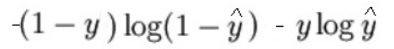


**Loss function:** Modele 0 ve 1'leri tanımasını isterken bazı yanlış tahminler döndürdüğünde elde edilen hata oranıdır.

Yapılan prediction (y_head değeri) doğruysa loss function değeri 0 olur.

Mesela görsel 1, yapılan prediction da 1 ise y değeri 1 ve y_head değeri de 1 olur. Bu değerler formüle koyulduğunda 1-y=1-1 0 değeri elde edilir ve log1 de 0'dır. Bu durumda loss function değeri 0'dır. Ancak görsel 1, yapılan prediction 0, yani yanlış prediction yapıldığında loss function değeri çok fazla çıkar.

Yapılan prediction yanlışsa loss değeri çok fazla olur.

**Cost Function:** Her görselin bir loss function değeri vardır. Tüm loss function değerlerinin toplamı cost function'ı verir.

Cost function değeri yüksekse oluşturulan model iyi bir model değildir, weight değerlerinin güncellenmesi lazımdır.

Her bir görsel ayrı ayrı numpy array'lerde tutulursa her birine ayrı ayrı forward propagation uygulanır.

Tüm görseller bir numpy array'e koyulduğunda tüm matrise bir kez forward propagation uygulanır. Bir forward propagation işleminde datadaki görsel kadar loss function değeri elde edilir. Bu loss değerleri toplanarak bir cost değeri elde edilir.

Cost function değeri yüksekse weight ve bias değerleri güncellenerek cost function değerini azaltmak amaçlanır.

**Backward Propagation**

Yapılan prediction yanlışsa Gradient Descent tekniği kullanılarak weight ve bias optimize edilir (cost function'a göre en uygun değerleri bulunur). 

Cost function'dan başlayarak geriye doğru gitme işlemine **backward propagation** denir.

**Optimization Algorithm with Gradient Descent**

Weight ve bias değerleri rastgele verildiği için cost değeri çok büyükse bu weight ve bias'a bağlıdır.

Cost değerini düşürmek için weight ve bias güncellenmelidir.

Cost function'ın minimize değeri weight ve bias'ı optimize ederek bulunur. Bu yöntem Gradient Descent'tir.

Cost değeri minimuma yaklaştıkça eğim azalır.

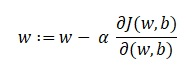

:= -> değişkeni güncellemek demektir.

J(θ) maliyet (cost) fonksiyonunu göstermektedir. 

cost function'ın weight ve bias'a göre türevi alınır.

weight ve bias güncellenebilen parametrelerdir.

“α” öğrenme hızını (learning rate) ifade etmektedir. Bir hyperparameter'dir. Önce bir değer seçilir. Daha sonra değiştirilerek doğru değer bulunur.

Learning rate çok küçük seçilirse öğrenme çok uzun sürer.

Learning rate çok büyük seçilirse bir sonraki nokta sürekli zıplayacaktır ve model asla öğrenemeyebilir.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


X görsellerden oluşan bir array.

Y ise görsellerin classlarından oluşan bir arraydır.

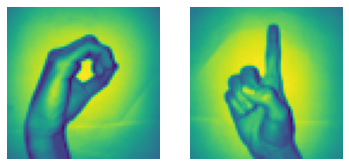

In [ ]:
x_l = np.load('/content/drive/MyDrive/data/X.npy')
Y_l = np.load('/content/drive/MyDrive/data/Y.npy')
img_size = 64 
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.show()

image size 64 olarak datada verilmişti. Her bir görselde 4096 tane piksel vardır. Bu pikseller imshow parametresi ile görselleştirilir.

subplot methoduyla iki görsel bir arada çizdirilmiştir.

reshape methoduyla datadaki görsel 64x64 boyutuna getirilir.

Datanın 260. ve 900. indekslerindeki görseller çizdirilmiştir.

Plot çizdirilirken normalde x ve y eksenleri de olur. axis('off') ile plot edilirken eksenler gözükmez.

In [ ]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


Görseller kullanılacak modellere öğretilmek için numpy array'e çevrilir.

Datada 204-409 indekslerinde 0 görseli, 822-1027 indekslerinde 1 görseli bulunmaktadır.

0 ve 1 görselleri kullanılacağından bu görseller seçilerek filtreleme yapılmıştır.

Y labelı 0 ve 1'lerden oluşan bir arraydir.

Datada her bir görsel için 205 sample bulunduğundan 0 ve 1'lerden oluşan 1x205 boyutunda arrayler oluşturulup, bu arrayler birleştirilip 1x410 boyutunda y labelı oluşturulmuştur.

X featurenın shape'i (410, 64, 64)'tir.

Her bir class için 205 sample bulunduğundan ve 0 ve 1 classları kullanılacağından 410'dur.

Datadaki görseller 64x64 boyutunda bir matrixten oluştuğundan 64,64 yazar.

Y labelında ise her bir değer için bir satır ayrılır. Bu yüzden satır boyutu 410, label tek bir sütundan oluştuğundan sütun sayısı 1'dir.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

Data eğitilirken %75'i training, %15'i testing için kullanılacaktır.

random_state parametresiyle kod her çalıştırıldığında aynı training datası kullanılır. Yani her seferinde datayı aynı randomlıkta böler. Eğer bu parametre kullanılmazsa kod her çalıştırıldığında datanın farklı bir bölümü training için ayrılacaktır ve accuracy değeri değişecektir.

Train ve test sample sayısına bakmak için bir değişkene eşitlenirler.

x train'in boyutu (348,64,64)'tür. Bunu deep learning modelinde kullanmak için 2 boyutlu hale getirilmelidir.

Görselin iki eksenindeki piksel sayısı da 64'tür. Bu eksen boyutları birleştirildiğinde 64x64 = 4096 boyutunda olur.

In [ ]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


(348,64,64) 

348 -> 0. indeks

64 -> 1.indeks

64 -> 2.indeks

Görselin bir ekseninde 64 piksel vardır ve bu 1. indekstedir. Diğer ekseninde de 64 piksel vardır ve bu 2. indekstedir. İki boyutlu hale getirmek için 1. ve 2. indeksler çarpılır.

Burada ayrıca train datasında 348 sample, test datasında 62 sample olduğu görülür.

In [ ]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


Train ve test datalarının transpose'u alınır. Böylelikle her bir feature bir satırda bulunmuş olur.

weight değerleri ile feature değerleri çarpılacağından matrix çarpımında 1. değerin column sayısı ile ikinci değerin row sayısı aynı olmalıdır.

weight shape (0.01,4096) -> her bir feature için bir weight değeri

x_train shape (4096,348)

(0.01,4096) * (4096,348) şu durumda matrix çarpımı için uygundur.

**Implementing Initializing Parameters and Sigmoid Function**

featurelar weightler ile çarpılıp bias ile toplanıp bir z değeri elde edilir. Bu z değeri sigmoid function'a koyulur. Sigmoid function 0-1 arasında olasılıksal bir y_head değeri verir.

In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

dimension feature sayısıdır, görselin boyutudur.

Weight değerleri featurelar ile çarpılacağından ve feature sayısı da 4096 olduğundan full methoduyla 4096x1'lik 0.01'lerden oluşan bir matrix oluşturulur.

4096 feature olduğu için her birine ayrı bir weight değeri tanımlanır.

weight değeri 0 atanırsa model öğrenemez ve weight değerleri güncellenemez. Bu yüzden 0.01 atanır.

In [ ]:
w,b = initialize_weights_and_bias(4096)

In [ ]:
w.shape #weight matrix'inin boyutu

(4096, 1)

**Sigmoid Function Formülü**

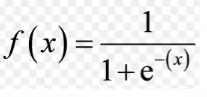

Bu formüldeki x, z değeridir.

In [ ]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

**Sigmoid Function Grafiği**

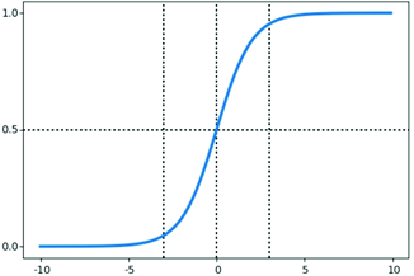

In [ ]:
sigmoid(0) #grafiğe bakıldığında, sigmoid function 0 değeri aldığı zaman 0.5 değerine dönüştürür.

0.5

In [ ]:
sigmoid(6) #6 değeri verildiği zaman 1'e çok yakın bir değer döner.

0.9975273768433653

**Implementing Forward and Backward Propagation**

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):

    # forward propagation
    z = np.dot(w.T,x_train) + b #her feature weight değerleri ile çarpılıp, bias ile toplanıp z değeri elde edilir.
    y_head = sigmoid(z) #z değerine sigmoid function uygulanarak y_head değeri elde edilir.
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) #loss function hesaplanır.
    cost = (np.sum(loss))/x_train.shape[1]   #loss function değerleri toplanarak coss function elde edilir.

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] #türev alınır. 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1] #türev alınır.             
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}

    return cost,gradients

forward_backward_propagation fonksiyonunun parametlerine bakıldığında;

**w,b** -> weight ve bias değerleridir.

**x_train** -> featurelardır.

**y_train** -> loss function hesaplanırken formülde bulunan y değeridir.

**x_train.shape[1]** -> çıkan değerler sample sayısına bölünür. Böylelikle eğer çıkan sonuç çok büyük bir değerse sample saysına göre scale edilmiş olur.

**derivative_weight, derivative_bias** -> eğer cost function değeri çok fazla çıktıysa türev alınarak weight ve bias değerlerinin ne kadar güncelleneceği bulunur.

**gradients** -> türev değerlerinin tutulduğu dictionary'dir.

**Implementing Update Parameters**

In [ ]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion): 
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train) #cost ve weight,bias için türev değerleri bulunur.
        cost_list.append(cost) #cost değeri listede tutulur.
        w = w - learning_rate * gradients["derivative_weight"]  
        b = b - learning_rate * gradients["derivative_bias"]   #weight ve bias değerleri formüle göre güncellenir.
        if i % 10 == 0:
            cost_list2.append(cost) #her 10 adımda bir cost değerleri depolanır.
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b} #parametreler dictionary'nin içinde depolanır.
    plt.plot(index,cost_list2) 
    plt.xticks(index,rotation='vertical') #vertical ile indexler 90 derecelik açıyla yazılır.
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list #weight, bias değerleri, türevler ve cost değerleri döndürülür.

**learning_rate modelin ne kadar hızlı öğrendiğidir.**

**number_of_iterarion** -> Forward kısmında cost değeri hesaplanıp, eğer cost değeri çok büyükse backward yapılır ve backward kısmında da türev alınıp weight ve bias değerlerinin ne kadar güncelleneceği bulunur. weight ve bias değerleri güncellendikten sonra cost değeri minimuma yaklaşmamışsa, en uygun cost değeri bulunmamışsa bu işlemler tekrarlanır. Bu parametre kaç defa forward ve backward yapılacağının sayısıdır.

Böylelikle en optimize weight ve bias değerleri bulunmuş olur.

**Implementing Prediction**

In [ ]:
def predict(w,b,x_test):
    
    y_head = sigmoid(np.dot(w.T,x_test)+b) 
    Y_prediction = np.zeros((1,x_test.shape[1])) #(1,62) shape'inde 0'lardan oluşan y_test boyutunda y_prediction değeri oluşturulur.
                                                 #allocation yapılmıştır/yer ayrılmıştır.
                                                 #y_prediction'da istenilen indekse ulaşılabilir.
    for i in range(y_head.shape[1]): 
        if y_head[0,i]<= 0.5: #0.5 değeri thresholddur.
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
                        #y_head değeri 0.5'ten büyükse 1, küçükse 0 y_prediction sonucu verilir.
    return Y_prediction

Prediction yapılırken model weight ve biaslardan oluştuğu için bu değerler alınır.

x_test -> içerisinde 0,1 görselleri bulunur. Bu dataya göre prediction yapılır.

prediction aşamasında sigmoid function'dan sonra 0-1 aralığında bulunan olasılıksal y_head değeri threshold'a koyularak 0 ya da 1 değeri elde edilir.

x_test'in shape(4096,62) -> 62 tane olasılıksal değer verilir.

Bulunan 1 ya da 0 değerlerinin gerçekten doğru olup olmadığını anlamak için cost function uygulanır.

Cost function'da y_test değerleri ile y_head değerleri karşılaştırılır.

**Implementing Logistic Regression**

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168
Cost after iteration 150: 0.190936
Cost after iteration 160: 0.186285
Cost after iteration 170: 0.182006
Cost after iteration 180: 0.178052
Cost after iteration 190: 0.174389
Cost after iteration 200: 0.170984
Cost after iteration 210: 0.167809
Cost after iteration 220: 0.164840
Cost after iteration 230: 0.162056
Cost after iteration 240: 0.159437
Cost after iteration 250: 0.156967
Cost after iteration 260: 0.154631
Cost after iteration 270: 0.152417
Cost after iteration 280: 0.15

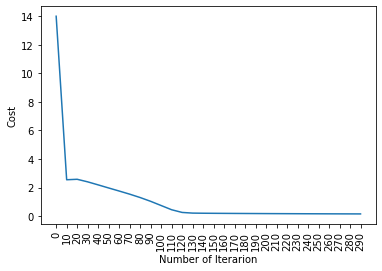

train accuracy: 96.26436781609195 %
test accuracy: 95.16129032258064 %


In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  #4096 -> feature sayısı
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 300)

num_iterations sayısı yani forward ve backward sayısı artırıldığı zaman cost değerinin zamanla azaldığı ve 0'a çok yaklaştığı görülür. Cost değerinin azalmasıyla weight ve bias parametreleri daha iyi öğrenir. Böylelikle accuracy değeri artar.

num_iteration 150 olduğunda test accuracy %93 iken, 300 olduğunda %95'dir. 

Logistic Regression modelinde;

**x_train** -> train yapılır.

**y_train** -> weight ve bias değerleri güncellenirken loss function formülündeki y değeridir.

**x_test** -> x_test datası ile y_prediction değerleri oluşturulur.

**y_test** -> labelları tutan datadır. y_prediction değerlerinin doğru olup olmadığı y_test datası ile karşılaştırılır.

**learning_rate** -> weight ve bias değerlerinin ne kadar hızlı güncelleneceğidir. Çok hızlı olunursa asla güncellenemeyebilir, çok yavaş olursa da güncellemek çok zaman alır.

**num_iterations** -> minimum cost değeri bulunana kadar yapılan forward ve backward sayısıdır.

**dimension** -> weight ve bias'ın initialize değerleri belirlenirken datadaki feature sayısıdır. Feature sayısı kadar weight ve bias initialize edilir.

**update** -> methodunda forward backward propagation birlikte bulunur ve optimize edilmiş weight, bias değerlerini verir.

**Logistic Regression with Sklearn**

In [ ]:
from sklearn import linear_model
lr= linear_model.LogisticRegression(random_state = 42,max_iter= 300) #max_iter kaç defa forward backward yapacağının sayısıdır.
lr.fit(x_train.T,y_train.T)

LogisticRegression(max_iter=300, random_state=42)

In [ ]:
y_pred=lr.predict(x_test.T)

In [ ]:
print("test accuracy: {}".format(lr.score(x_test.T,y_test.T))) #score methoduyla prediction yapılıp accuracy hesaplanır.   
print("train accuracy: {} ".format(lr.score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871
train accuracy: 1.0 


Sklearn'de logistic regression'ın birden fazla parametresi vardır. 

Bu parametreler modelin iyileşmesini sağlamaktadır ve default değer almaktadır. Eğer değerleri değiştirilirse accuracy de değişecektir.